In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 3: Python DB-API


## CHAPTER 1: Welcome to your Database

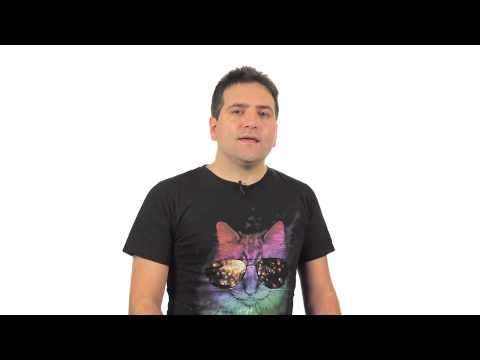

In [2]:
id = 'usAGebKnQSk'
YouTubeVideo(id=id, width=600)

For a quick reference on the material in this lesson, see the "Reference" page at the end of the lesson.

## CHAPTER 2: What is DB-API

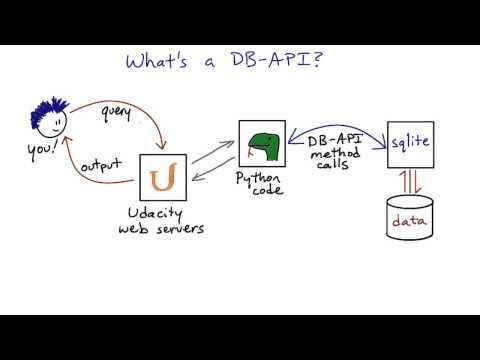

In [3]:
id = 'l-8BgRIaPtc'
YouTubeVideo(id=id, width=600)

## CHAPTER 3: Writing Code with DB API

In [4]:
id = 'Zd0PAgb6vY4'
YouTubeVideo(id=id, width=600)

The __connect__ function for PostgreSQL uses a different argument syntax from the one for SQLite. When you want to connect to a database called, say, __bears__, you'll use ``psycopg2.connect("dbname=bears"``).

## CHAPTER 4: Quiz: Trying out DB API

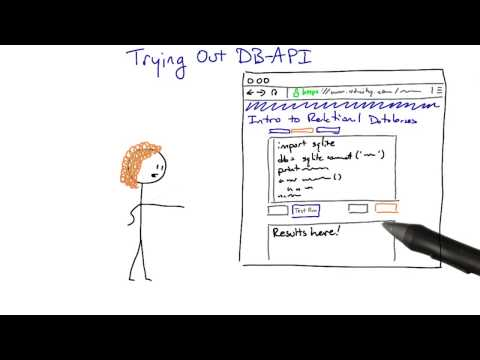

In [5]:
id = '4Ywln5AT6Hc'
YouTubeVideo(id=id, width=600)

#### Answer:
```python
# To see how the various functions in the DB-API work, take a look at this code,
# then the results that it prints when you press "Test Run".
#
# Then modify this code so that the student records are fetched in sorted order
# by student's name.
#

import sqlite3

# Fetch some student records from the database.
db = sqlite3.connect("students")
c = db.cursor()
query = "select name, id from students order by name;"
c.execute(query)
rows = c.fetchall()

# First, what data structure did we get?
print "Row data:"
print rows

# And let's loop over it too:
print
print "Student names:"
for row in rows:
  print "  ", row[0]

db.close()
```

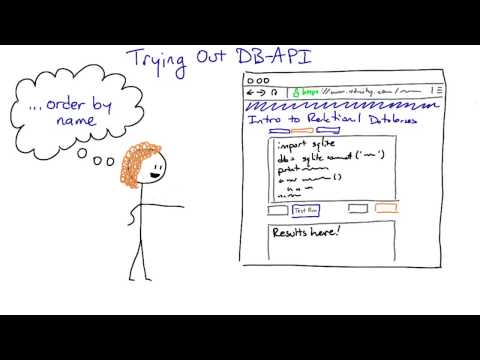

In [6]:
id = 'QTq9pGMoZAE'
YouTubeVideo(id=id, width=600)

## CHAPTER 5: Quiz: Inserts in DB API

In [8]:
id = 'pn3MunHovMc'
YouTubeVideo(id=id, width=600)

#### Ansewer: 
```python
# This code attempts to insert a new row into the database, but doesn't
# commit the insertion.  Add a commit call in the right place to make
# it work properly.
# 

import sqlite3

db = sqlite3.connect("testdb")
c = db.cursor()
c.execute("insert into balloons values ('blue', 'water') ")
db.commit()
db.close()
```

In [7]:
id = 'RfYFqGPxMQM'
YouTubeVideo(id=id, width=600)

## CHAPTER 6: Running the Forum

 If you missed the instructions for setting up your Vagrant VM at the end of the previous lesson, here they are again:

* Installing the Virtual Machine (Full Stack ND)

* Installing the Virtual Machine (Intro to Programming ND)

* [Installing the Virtual Machine (ud197)](https://classroom.udacity.com/courses/ud197/lessons/3423258756/concepts/14c72fe3-e3fe-4959-9c4b-467cf5b7c3a0)

You will need a terminal open and logged in to your VM (with ``vagrant ssh``) before continuing on.

### Errata:

On some Windows systems, you will need to use ``winpty vagrant ssh`` instead of ``vagrant ssh``. See the __Troubleshooting__ section on the page linked above.


In [9]:
id = 'aqtXzfexKLo'
YouTubeVideo(id=id, width=600)

You can use your preferred text editor on your computer to edit the forum code. However, when you run the forum code, you should only run it inside the Vagrant virtual machine, i.e. within a terminal window where you've run ``vagrant ssh`` to log into the VM.

## CHAPTER 7: Hello PostgreSQL

In [10]:
id = 'kD22qRZzkRg'
YouTubeVideo(id=id, width=600)

The ``psql`` command-line tool is really powerful. There's a complete reference to it [in the PostgreSQL documentation](https://www.postgresql.org/docs/9.4/app-psql.html).

To connect ``psql`` to a database running on the same machine (such as your VM), all you need to give it is the database name. For instance, the command ``psql forum`` will connect to the ``forum`` database.

From within ``psql``, you can run any SQL statement using the tables in the connected database. Make sure to end SQL statements with a semicolon, which is not always required from Python.

You can also use a number of special ``psql`` commands to get information about the database and make configuration changes. The ``\d posts`` command shown in the video is one example — this displays the columns of the ``posts`` table.

#### Some other things you can do:

``\dt`` — list all the tables in the database.

``\dt+`` — list tables plus additional information (notably, how big each table is on disk).

``\H`` — switch between printing tables in plain text vs. HTML.

---
Here's a fun one to run in psql while your forum web app is running:

``select * from posts \watch``

(Note that ``\watch`` replaces the semicolon.) This will display the contents of the ``posts`` table and refresh it every two seconds, so you can see changes to the table as you use the app.

In order to do this, you'll need two terminal sessions into your VM — one running the forum app, and the other running ``psql``. You can connect to the VM from any number of terminal windows at once — just open up another terminal, change to the ``vagrant`` directory, and type ``vagrant ssh`` again.


## CHAPTER 8: Give That App a Backend

In [11]:
id = '0ZwU6bmEQDI'
YouTubeVideo(id=id, width=600)

The ``forum`` database has already been created for you in the virtual machine that you downloaded. Your code will need to connect to it using ``psycopg2.connect("dbname=forum")`` and then perform ``select`` and ``insert`` operations on the ``posts`` table.

The existing ``get_posts`` function returns all the entries from a list. So its database version should return all the entries from the ``posts`` table.

And likewise, the existing ``add_post`` function inserts an entry into a list.

You do not need to provide the ``time`` column when you insert a post. The table is set up to already provide a timestamp.

The existing ``get_posts`` function puts the posts in order using a Python ``reversed`` function. When you implement this function using the database, can you put the posts in order using only SQL?

### Update the ``forumdb.py`` code to use the database
* I have updated ``get_posts`` to perform a ``select`` query.
* I have updated ``add_post`` to perform an ``insert`` query.
* I am putting the posts in order using SQL rather than in Python code.

In [12]:
id = 'GTGzAsE9wS4'
YouTubeVideo(id=id, width=600)

### Errata:

__There is a mistake in the code in the video above.__ Lines 14 and 15 should be swapped, so that ``db.close()`` is called before the ``get_posts`` function returns.

The code appears correctly in the video at the top of the next page.

## CHAPTER 9: Bobby Tables, Destroyer of Posts

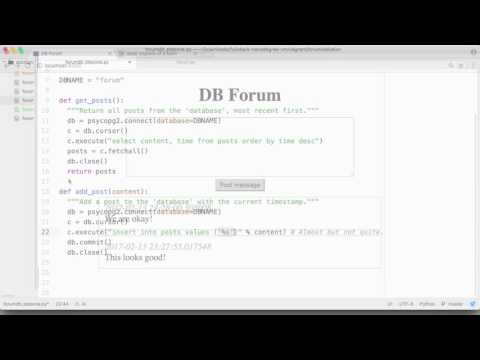

In [13]:
id = 'SrlvcnS_WUo'
YouTubeVideo(id=id, width=600)

When the video prompts you to, copy this post into your forum and submit it:
```python
'); delete from posts; --

```

## CHAPTER 10: Curing Bobby Tables

In [14]:
id = '93ea9H3ZtqE'
YouTubeVideo(id=id, width=600)

At the end, the video says to press "Submit". That's for an older version of this quiz. Instead, just complete this checklist —

Update the forum code to be safe against the SQL injection attack. Check your work by writing forum posts that contain single quotes. Also check that the attack message doesn't delete the forum any more.

### Task List:
* I updated the code to use query parameters.
* I tested it with a post containing a single quote.
* I tested it with the attack query ```'); delete from posts; --``.



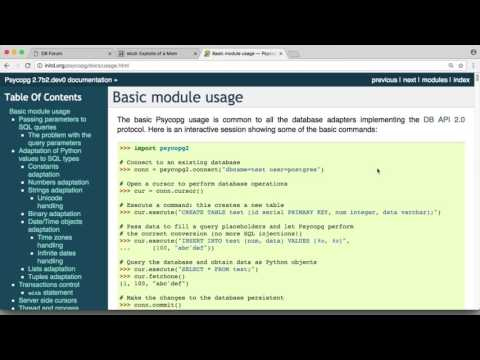

In [15]:
id = 'WQv2ORD-OAU'
YouTubeVideo(id=id, width=600)

By the way, the warnings about using % with SQL statements and user data also apply to newer ways of doing string formatting in Python. This includes [f-strings, introduced in Python 3.6](https://docs.python.org/3/reference/lexical_analysis.html#f-strings).

## CHAPTER 11: Spammy Tables

In [16]:
id = '5B8Ly3WX7sI'
YouTubeVideo(id=id, width=600)

Paste this text into your forum (including the ``script`` tags!) and submit it:
```html
<script>
setTimeout(function() {
    var tt = document.getElementById('content');
    tt.value = "<h2 style='color: #FF6699; font-family: Comic Sans MS'>Spam, spam, spam, spam,<br>Wonderful spam, glorious spam!</h2>";
    tt.form.submit();
}, 2500);
</script>
```

## CHAPTER 12: Stopping the Spam

In [17]:
id = 'R3r8i4pasGE'
YouTubeVideo(id=id, width=600)

[Bleach Documentation](https://bleach.readthedocs.io/en/latest/)

#### Answer:

In [18]:
id = '9XHEthXA37k'
YouTubeVideo(id=id, width=600)

## CHAPTER 13: Quiz: Updating Away the Spam

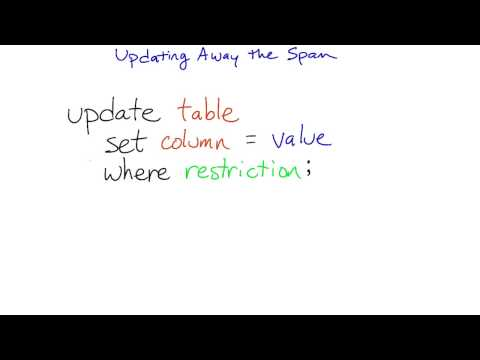

In [19]:
id = 'hYhU47dUwo8'
YouTubeVideo(id=id, width=600)

The syntax of the __update__ statement:

*__update__ table __set__ column = value __where__ restriction ;

The restriction works the same as in __select__ and supports the same set of operators on column values.

---

The __like__ operator supports a simple form of text pattern-matching. Whatever is on the left side of the operator (usually the name of a text column) will be matched against the pattern on the right. The pattern is an SQL text string (so it's in __'single quotes'__) and can use the __\%__ sign to match any sub-string, including the empty string.

If you are familiar with regular expressions, think of the __\%__ in __like__ patterns as being like the regex __\*__ (dot star).

If you are more familiar with filename patterns in the Unix shell or Windows command prompt, __\%__ here is a lot like __\*__ (star) in those systems.

For instance, for a table row where the column __fish__ has the value __'salmon'__, all of these restrictions would be true:

* __fish like 'salmon'__
* __fish like 'salmon%'__
* __fish like 'sal%'__
* __fish like '%n'__
* __fish like 's%n'__
* __fish like '%al%'__
* __fish like '%'__
* __fish like '%%%'__

And all of these would be false:

* __fish like 'carp'__
* __fish like 'salmonella'__
* __fish like '%b%'__
* __fish like 'b%'__
* __fish like ''__


## CHAPTER 14: Quiz: Deleting the Spam

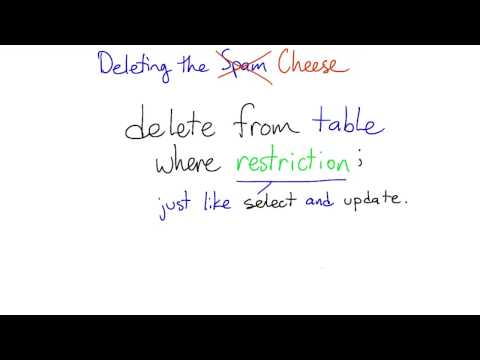

In [20]:
id = 'X_RkedyfwX0'
YouTubeVideo(id=id, width=600)

[Don't remember who Bobby Tables is?](https://xkcd.com/327/)

He's got his own web site now: http://bobby-tables.com/

The syntax for the __delete__ command: *__delete from table where restriction__* ; The restriction works the same way as in __select__, with the same set of operators allowed.

#### Answer:

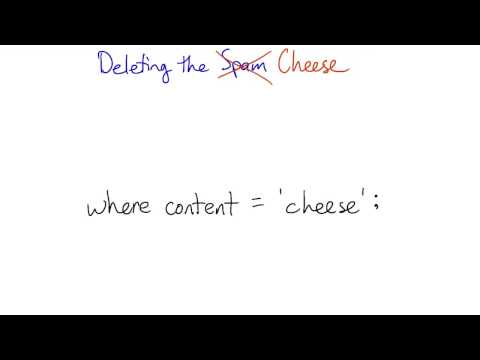

In [21]:
id = 'YbvvcMlQHQ8'
YouTubeVideo(id=id, width=600)

## CHAPTER 15: Conclusion

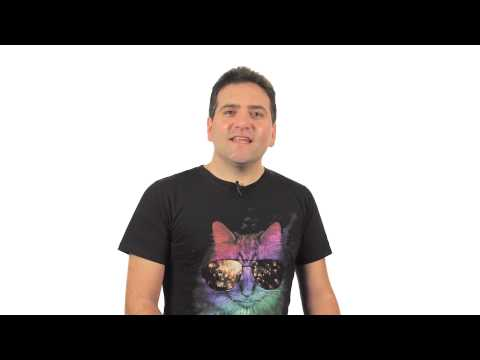

In [22]:
id = 'Xm0MkVaZwmQ'
YouTubeVideo(id=id, width=600)

## CHAPTER 16: Reference — Python DB-API

### Reference — Python DB-API

This is a reference for the material covered in the "Python DB-API" lesson.

---
### Python DB-API Quick Reference

For a full reference to the Python DB-API, see [the specification](https://www.python.org/dev/peps/pep-0249/) and the documentation for specific database modules, such as [sqlite3](https://docs.python.org/2/library/sqlite3.html) and [psycopg2](http://initd.org/psycopg/docs/).

#### *module.connect(...)*
Connect to a database. The arguments to __connect__ differ from module to module; see the documentation for details. __connect__ returns a __Connection__ object or raises an exception.

For the methods below, note that you don't literally call (for instance) ``Connection.cursor()`` in your code. You make a ``Connection`` object, save it in a variable (maybe called ``db``) and then call ``db.cursor()``.

#### Connection.cursor()
Makes a __Cursor__ object from a connection. Cursors are used to send SQL statements to the database and fetch results.

#### Connection.commit()
Commits changes made in the current connection. You must call __commit__ before closing the connection if you want changes (such as inserts, updates, or deletes) to be saved. Uncommitted changes will be visible from your currect connection, but not from others.

#### Connection.rollback()
Rolls back (undoes) changes made in the current connection. You must roll back if you get an exception if you want to continue using the same connection.

#### Connection.close()
Closes the connection. Connections are always implicitly closed when your program exits, but it's a good idea to close them manually especially if your code might run in a loop.

#### Cursor.execute(statement)
#### Cursor.execute(statement, tuple)
Execute an SQL statement on the database. If you want to substitute variables into the SQL statement, use the second form — see [the documentation](http://initd.org/psycopg/docs/usage.html#query-parameters) for details.

If your statement doesn't make sense (like if it asks for a column that isn't there), or if it asks the database to do something it can't do (like delete a row of a table that is referenced by other tables' rows) you will get an exception.

#### Cursor.fetchall()
Fetch all the results from the current statement.

#### Cursor.fetchone()
Fetch just one result. Returns a tuple, or __None__ if there are no results.

---
### psql Quick Reference

The __psql__ command-line tool is really powerful. There's a complete reference to it [in the PostgreSQL documentation](https://www.postgresql.org/docs/9.4/app-psql.html).

To connect ``psql`` to a database running on the same machine (such as your VM), all you need to give it is the database name. For instance, the command ``psql forum`` will connect to the ``forum`` database.

From within ``psql``, you can run any SQL statement using the tables in the connected database. Make sure to end SQL statements with a semicolon, which is not always required from Python.

You can also use a number of special ``psql`` commands to get information about the database and make configuration changes. The ``\d posts`` command shown in the video is one example — this displays the columns of the ``posts`` table.

Some other things you can do:

``\dt`` — list all the tables in the database.

``\dt+`` — list tables plus additional information (notably, how big each table is on disk).

``\H`` — switch between printing tables in plain text vs. HTML.

---
### Bleach documentation

Read the documentation for Bleach here: http://bleach.readthedocs.org/en/latest/

---
### Update and delete statements

The syntax of the ``update`` and ``delete`` statements:

*``update table set column = value where restriction ;``*
*``delete from table where restriction ;``*

The ``where`` restriction in both statements works the same as in ``select`` and supports the same set of operators on column values. In both cases, if you leave off the ``where`` restriction, the update or deletion will apply to all rows in the table, which is usually not what you want.

---
### like operator

The ``like`` operator supports a simple form of text pattern-matching. Whatever is on the left side of the operator (usually the name of a text column) will be matched against the pattern on the right. The pattern is an SQL text string (so it's in ``'single quotes'``) and can use the ``%`` sign to match any sub-string, including the empty string.

If you are familiar with regular expressions, think of the ``%`` in like patterns as being like the regex .``*`` (dot star).

If you are more familiar with filename patterns in the Unix shell or Windows command prompt, ``%`` here is a lot like ``*`` (star) in those systems.

For instance, for a table row where the column ``fish`` has the value ``'salmon'``, all of these restrictions would be true:

* fish like 'salmon'
* fish like 'salmon%'
* fish like 'sal%'
* fish like '%n'
* fish like 's%n'
* fish like '%al%'
* fish like '%'
* fish like '%%%'

And all of these would be false:

* fish like 'carp'
* fish like 'salmonella'
* fish like '%b%'
* fish like 'b%'
* fish like ''

The term "spam" referring to junk posts comes from [Monty Python's "Spam" sketch](https://www.youtube.com/watch?v=anwy2MPT5RE). On the Internet, "spamming" was first used to mean [repetitious junk messages](https://www.templetons.com/brad/spamterm.html) intended to disrupt a group chat. Later, it came to refer to unsolicited ads on forums or email; and more recently to more-or-less any repetitious or uninvited junk message.
